In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df_train=pd.read_csv('train.csv')
df_test=pd.read_csv('test.csv')

In [3]:
df_train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df_train.drop('PassengerId',axis=1,inplace=True)

In [5]:
df_train.head(5)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Data Visualization

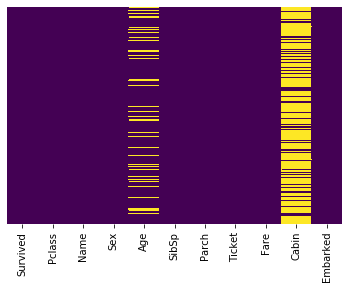

In [6]:
sns.heatmap(df_train.isnull(), yticklabels=False, cbar=False, cmap='viridis' )

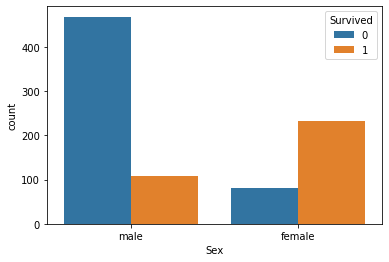

In [7]:
sns.countplot(x='Sex',data=df_train,hue='Survived')

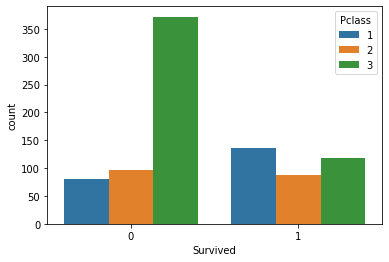

In [8]:
sns.countplot(x='Survived',data=df_train,hue='Pclass')

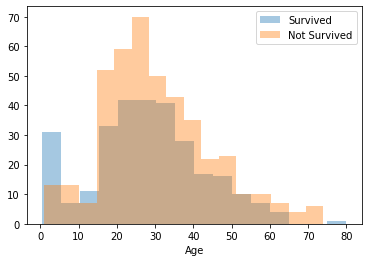

In [9]:
age=df_train[['Age','Survived']]
sns.distplot(age[age['Survived']==1].Age.dropna(),kde=False,label='Survived')
sns.distplot(age[age['Survived']==0].Age.dropna(),kde=False,label='Not Survived')
plt.legend(loc='best')

In [10]:
import cufflinks as cf
cf.go_offline()
df_train['Fare'].iplot(kind='hist',bins=30,color='green')

ModuleNotFoundError: No module named 'cufflinks'

# Data Cleaning

#always do this step since training and testing are seprate files
data = [train_df, test_df]

for dataset in data:

# Checking missing values

In [11]:
total = df_train.isnull().sum().sort_values(ascending=False)
total

Cabin       687
Age         177
Embarked      2
Fare          0
Ticket        0
Parch         0
SibSp         0
Sex           0
Name          0
Pclass        0
Survived      0
dtype: int64

In [12]:
total = df_test.isnull().sum().sort_values(ascending=False)
total

Cabin          327
Age             86
Fare             1
Embarked         0
Ticket           0
Parch            0
SibSp            0
Sex              0
Name             0
Pclass           0
PassengerId      0
dtype: int64

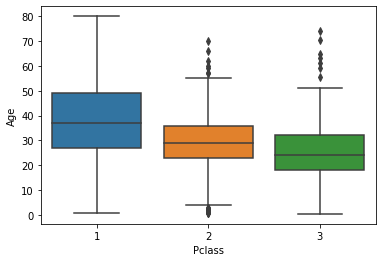

In [13]:
sns.boxplot(data=df_train,x='Pclass',y='Age')

In [14]:
def impute_age(cols):
    Age=cols[0]
    Pclass=cols[1]
    if pd.isnull(Age):

        if Pclass == 1:
            return 38

        elif Pclass == 2:
            return 29

        else:
            return 24

    else:
        return Age

In [15]:
df_train['Age'] = df_train[['Age','Pclass']].apply(impute_age,axis=1)
df_test['Age'] = df_test[['Age','Pclass']].apply(impute_age,axis=1)

In [16]:

import re
deck = {"A": 1, "B": 2, "C": 3, "D": 4, "E": 5, "F": 6, "G": 7, "U": 8}
#Always do this step
data = [df_train,df_test]

for dataset in data:
    dataset['Cabin'] = dataset['Cabin'].fillna("U0")
    dataset['Deck'] = dataset['Cabin'].map(lambda x: re.compile("([a-zA-Z]+)").search(x).group())
    dataset['Deck'] = dataset['Deck'].map(deck)
    dataset['Deck'] = dataset['Deck'].fillna(0)
    dataset['Deck'] = dataset['Deck'].astype(int)
# we can now drop the cabin feature
train_df = df_train.drop(['Cabin'], axis=1)
test_df = df_test.drop(['Cabin'], axis=1)

In [17]:
df_train['Embarked'].describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

In [18]:
common_value = 'S'
data = [df_train, df_train]

for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].fillna(common_value)

In [19]:
data=[df_train,df_test]

for dataset in data:
    dataset['Fare']=dataset['Fare'].fillna(0)
    dataset['Fare']=dataset['Fare'].astype(int)

In [20]:
genders = {"male": 0, "female": 1}
data = [df_train, df_test]

for dataset in data:
    dataset['Sex'] = dataset['Sex'].map(genders)

In [21]:
embarked={"C":0,"S":1,"Q":2}
data = [df_train, df_test]

for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].map(embarked)

In [22]:
df_train.head(5)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Deck
0,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7,U0,1,8
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71,C85,0,3
2,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7,U0,1,8
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53,C123,1,3
4,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8,U0,1,8


In [23]:
df_train.drop('Name',axis=1,inplace=True)
df_train.drop('Ticket',axis=1,inplace=True)
df_train.drop('Cabin',axis=1,inplace=True)
df_test.drop('Name',axis=1,inplace=True)
df_test.drop('Ticket',axis=1,inplace=True)
df_test.drop('Cabin',axis=1,inplace=True)
df_test.drop('PassengerId',axis=1,inplace=True)

In [24]:
df_train.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Deck
0,0,3,0,22.0,1,0,7,1,8
1,1,1,1,38.0,1,0,71,0,3
2,1,3,1,26.0,0,0,7,1,8
3,1,1,1,35.0,1,0,53,1,3
4,0,3,0,35.0,0,0,8,1,8


In [25]:
df_test.head(5)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Deck
0,3,0,34.5,0,0,7,2,8
1,3,1,47.0,1,0,7,1,8
2,2,0,62.0,0,0,9,2,8
3,3,0,27.0,0,0,8,1,8
4,3,1,22.0,1,1,12,1,8


In [26]:
X_train=df_train.drop('Survived',axis=1)
y_train=df_train['Survived']
X_test=df_test

# Logistic Regression

In [27]:
from sklearn.linear_model import LogisticRegression

In [28]:
logistic=LogisticRegression()
logistic.fit(X_train,y_train)
logistic_pred=logistic.predict(X_test)

# Random Forest

In [29]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [30]:
rf=RandomForestClassifier(n_estimators=300,max_depth=25,min_samples_leaf=2,min_samples_split=2)

In [31]:
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=25, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [32]:
rf_pred = rf.predict(X_test)

In [33]:
# #n_estimators = [100, 300, 500, 800, 1200]
# max_depth = [5, 8, 15, 25, 30]
# min_samples_split = [2, 5, 10, 15, 100]
# min_samples_leaf = [1, 2, 5, 10] 

# hyperF = dict(n_estimators = n_estimators, max_depth = max_depth,  
#               min_samples_split = min_samples_split, 
#              min_samples_leaf = min_samples_leaf)

# gridF = GridSearchCV(rf, hyperF, cv = 3, verbose = 1, 
#                       n_jobs = -1)
# bestF = gridF.fit(X_train, y_train)

In [34]:
#gridF.best_params_

# K Nearest Neighbor

In [35]:
from sklearn.neighbors import KNeighborsClassifier

In [36]:
knn=KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train)
knn_pred=knn.predict(X_test)

In [37]:
param_grid = {'n_neighbors': np.arange(1, 25)}
grid=GridSearchCV(knn,param_grid,cv=3, verbose = 1, 
                      n_jobs = -1)
grid.fit(X_train,y_train)
grid.best_params_

Fitting 3 folds for each of 24 candidates, totalling 72 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done  72 out of  72 | elapsed:    2.9s finished


{'n_neighbors': 7}

# SVM

In [38]:
from sklearn.svm import SVC
svm=SVC(kernel='rbf',C=100,gamma=0.001)

In [39]:
param_grid = {'C': [0.1,1,10,100], 'gamma': [1,0.1,0.01,0.001]}

In [40]:
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=2)
grid.fit(X_train,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] C=0.1, gamma=1 ..................................................
[CV] ................................... C=0.1, gamma=1, total=   0.1s
[CV] C=0.1, gamma=1 ..................................................
[CV] ................................... C=0.1, gamma=1, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ................................... C=0.1, gamma=1, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ................................... C=0.1, gamma=1, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] ................................... C=0.1, gamma=1, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ................................. C=0.1, gamma=0.1, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ................................. C=0.1, gamma=0.1, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ................................. C=0.1, gamma=0.1, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ................................. C=0.1, gamma=0.1, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ................................. C=0.1, gamma=0.1, total=   0.0s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ................................ C=0.1, gamma=0.01, total=   0.0s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] .

[CV] ................................... C=100, gamma=1, total=   0.1s
[CV] C=100, gamma=1 ..................................................
[CV] ................................... C=100, gamma=1, total=   0.1s
[CV] C=100, gamma=0.1 ................................................
[CV] ................................. C=100, gamma=0.1, total=   0.1s
[CV] C=100, gamma=0.1 ................................................
[CV] ................................. C=100, gamma=0.1, total=   0.1s
[CV] C=100, gamma=0.1 ................................................
[CV] ................................. C=100, gamma=0.1, total=   0.1s
[CV] C=100, gamma=0.1 ................................................
[CV] ................................. C=100, gamma=0.1, total=   0.1s
[CV] C=100, gamma=0.1 ................................................
[CV] ................................. C=100, gamma=0.1, total=   0.1s
[CV] C=100, gamma=0.01 ...............................................
[CV] .

[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:    2.9s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100],
                         'gamma': [1, 0.1, 0.01, 0.001]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=2)

In [41]:
grid.best_params_

{'C': 100, 'gamma': 0.001}

In [42]:
svm.fit(X_train, y_train)
svm_pred=svm.predict(X_test)

# Decision Tree

In [43]:
from sklearn.tree import DecisionTreeClassifier

In [44]:
dtree=DecisionTreeClassifier()

In [45]:
dtree.fit(X_train, y_train)  
dtree_pred = dtree.predict(X_test)

In [46]:
from sklearn.metrics import accuracy_score

In [47]:
acc_lr=round(logistic.score(X_train,y_train)*100,2)
acc_rf=round(rf.score(X_train,y_train)*100,2)
acc_knn=round(knn.score(X_train,y_train)*100,2)
acc_svm=round(svm.score(X_train,y_train)*100,2)
acc_dt=round(dtree.score(X_train,y_train)*100,2)

In [48]:
results = pd.DataFrame({
    'Model': ['Logistic Regression', 'Random Forest', 'K Nearest Neighbhor', 'Support Vector Machine', 'Decision Tree'],
    'Score': [acc_lr,acc_rf,acc_knn,acc_svm,acc_dt]})
result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df.head(9)

,Model
Score,
97.19,Decision Tree
91.36,Random Forest
83.61,Support Vector Machine
80.02,Logistic Regression
77.89,K Nearest Neighbhor


# K Fold cross validation

In [49]:
from sklearn.model_selection import cross_val_score
accuracies=cross_val_score(rf, X_train, y_train, cv=10)

In [50]:
print(accuracies.mean())
print(accuracies.std())

0.8372908863920101
0.04814284423633044


# Feature importance in Random Forest

In [51]:
importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(rf.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances.head(15)

,importance
feature,
Sex,0.339
Age,0.198
Fare,0.171
Pclass,0.095
Deck,0.075
SibSp,0.048
Parch,0.037
Embarked,0.037


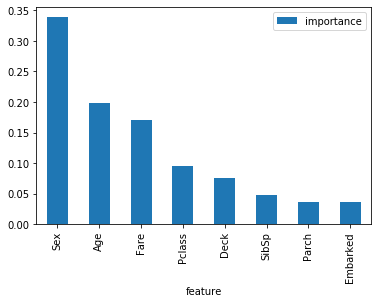

In [52]:
importances.plot.bar()

In [53]:
#Parch doesn't show any sigficance hence needed to be dropped
df_train=df_train.drop('Parch',axis=1)
df_test=df_test.drop('Parch',axis=1)

In [54]:
#training random forest again
rf=RandomForestClassifier(n_estimators=300,max_depth=25,min_samples_leaf=2,min_samples_split=2)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
acc_rf=round(rf.score(X_train,y_train)*100,2)

# Further Evaluation

In [55]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

In [56]:
rf_predictions = cross_val_predict(rf, X_train, y_train, cv=3)
confusion_matrix(y_train, rf_predictions)

array([[491,  58],
       [ 95, 247]], dtype=int64)

In [60]:
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score

print ("Accracy:",rf.score(X_train,y_train))
print ("Precision:", precision_score(y_train, rf_predictions))
print ("Recall:",recall_score(y_train, rf_predictions))
print ("F1-score:",f1_score(y_train, rf_predictions))

Accracy: 0.9113355780022446
Precision: 0.8098360655737705
Recall: 0.7222222222222222
F1-score: 0.7635239567233385


# plot the precision and recall with the threshold using matplotlib

In [ ]:
from sklearn.metrics import precision_recall_curve

# getting the probabilities of our predictions
y_scores = rf.predict_proba(X_train)
y_scores = y_scores[:,1]

precision, recall, threshold = precision_recall_curve(y_train, y_scores)
def plot_precision_and_recall(precision, recall, threshold):
    plt.plot(threshold, precision[:-1], "r-", label="precision", linewidth=5)
    plt.plot(threshold, recall[:-1], "b", label="recall", linewidth=5)
    plt.xlabel("threshold", fontsize=19)
    plt.legend(loc="upper right", fontsize=19)
    plt.ylim([0, 1])

plt.figure(figsize=(14, 7))
plot_precision_and_recall(precision, recall, threshold)
plt.show()

# ROC AUC Curve and Score

In [ ]:
from sklearn.metrics import roc_curve
# compute true positive rate and false positive rate
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, y_scores)
# plotting them against each other
def plot_roc_curve(false_positive_rate, true_positive_rate, label=None):
    plt.plot(false_positive_rate, true_positive_rate, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'r', linewidth=4)
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate (FPR)', fontsize=16)
    plt.ylabel('True Positive Rate (TPR)', fontsize=16)

plt.figure(figsize=(14, 7))
plot_roc_curve(false_positive_rate, true_positive_rate)

In [ ]:
from sklearn.metrics import roc_auc_score
r_a_score = roc_auc_score(y_train, y_scores)
print("ROC-AUC-Score:", r_a_score)

In [ ]:
test=pd.read_csv('test.csv')

In [ ]:
test=test['PassengerId']

In [ ]:
submission=pd.DataFrame({'PassengerId':test,'Survived':rf_pred})
submission.c

In [ ]:
submission.to_csv("submission.csv",index=False)